In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
data = pd.read_csv('placement.csv')
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
data.drop(['sl_no','specialisation','mba_p'],axis=1,inplace=True)

In [4]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Placed,425000.0


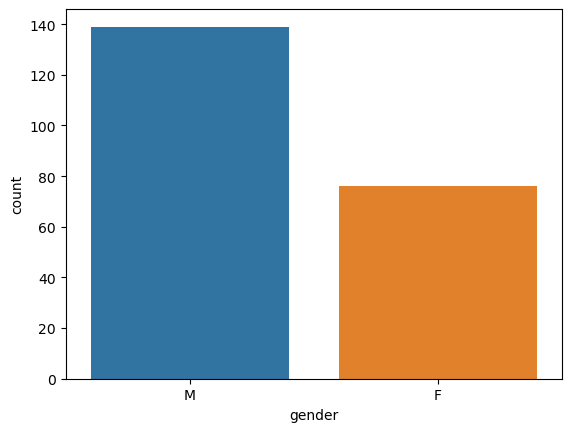

In [5]:
import seaborn as sns
from matplotlib.pyplot import show
ag=sns.countplot(x="gender",data=data)

<Axes: xlabel='gender', ylabel='count'>

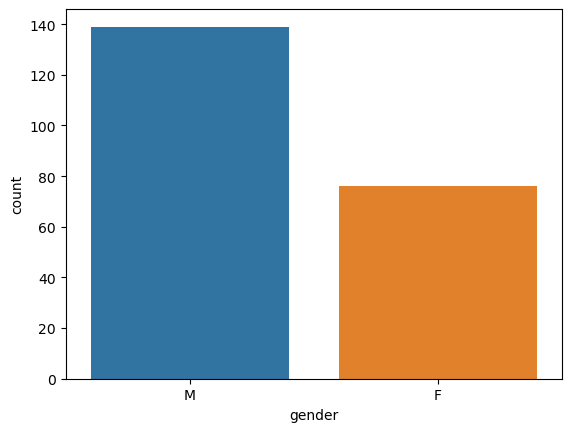

In [6]:
sns.countplot(x="gender",data=data)

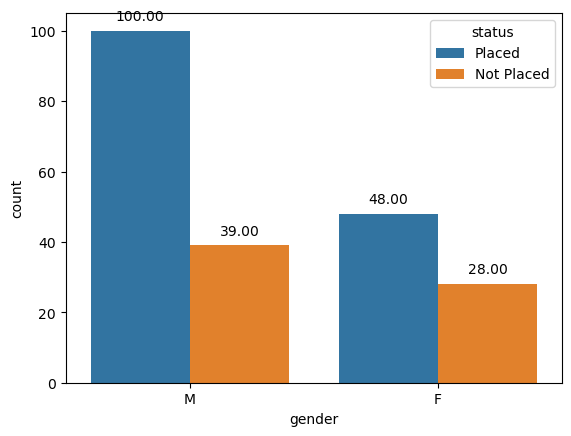

In [7]:
ax=sns.countplot(x="gender",hue='status',data=data)
for p in ax.patches:
    height = p.get_height()
    width=p.get_x()+p.get_width()/2.
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 


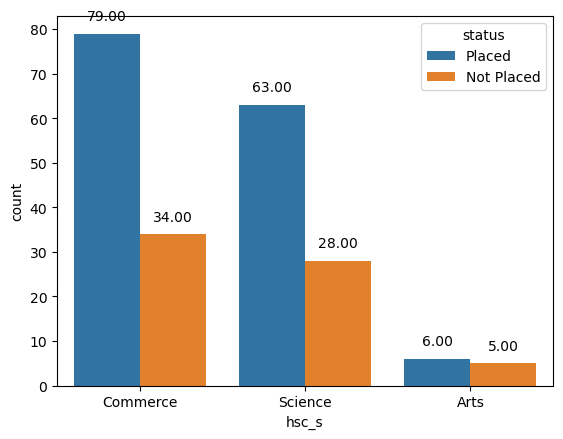

In [8]:
ax=sns.countplot(x="hsc_s",hue='status',data=data)
for p in ax.patches:
    height = p.get_height()
    width=p.get_x()+p.get_width()/2.
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 
       
show()

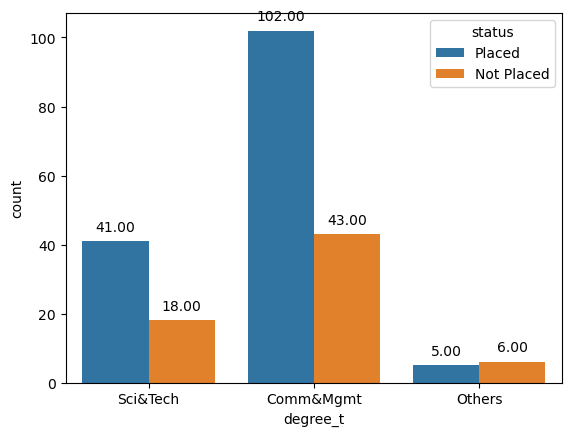

In [9]:
ax=sns.countplot(x="degree_t",hue='status',data=data)
for p in ax.patches:
    height = p.get_height()
    width=p.get_x()+p.get_width()/2.
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 
       
show()

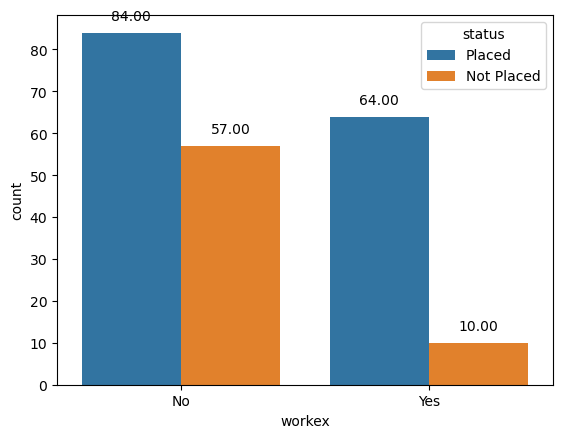

In [10]:
ax=sns.countplot(x="workex",hue='status',data=data)
for p in ax.patches:
    height = p.get_height()
    width=p.get_x()+p.get_width()/2.
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 
show()


In [11]:
total_count=data['gender'].groupby(data['gender']).count()
total_male_count=total_count['M']
total_female_count=total_count['F']

In [12]:
data['status'].unique().tolist()

['Placed', 'Not Placed']

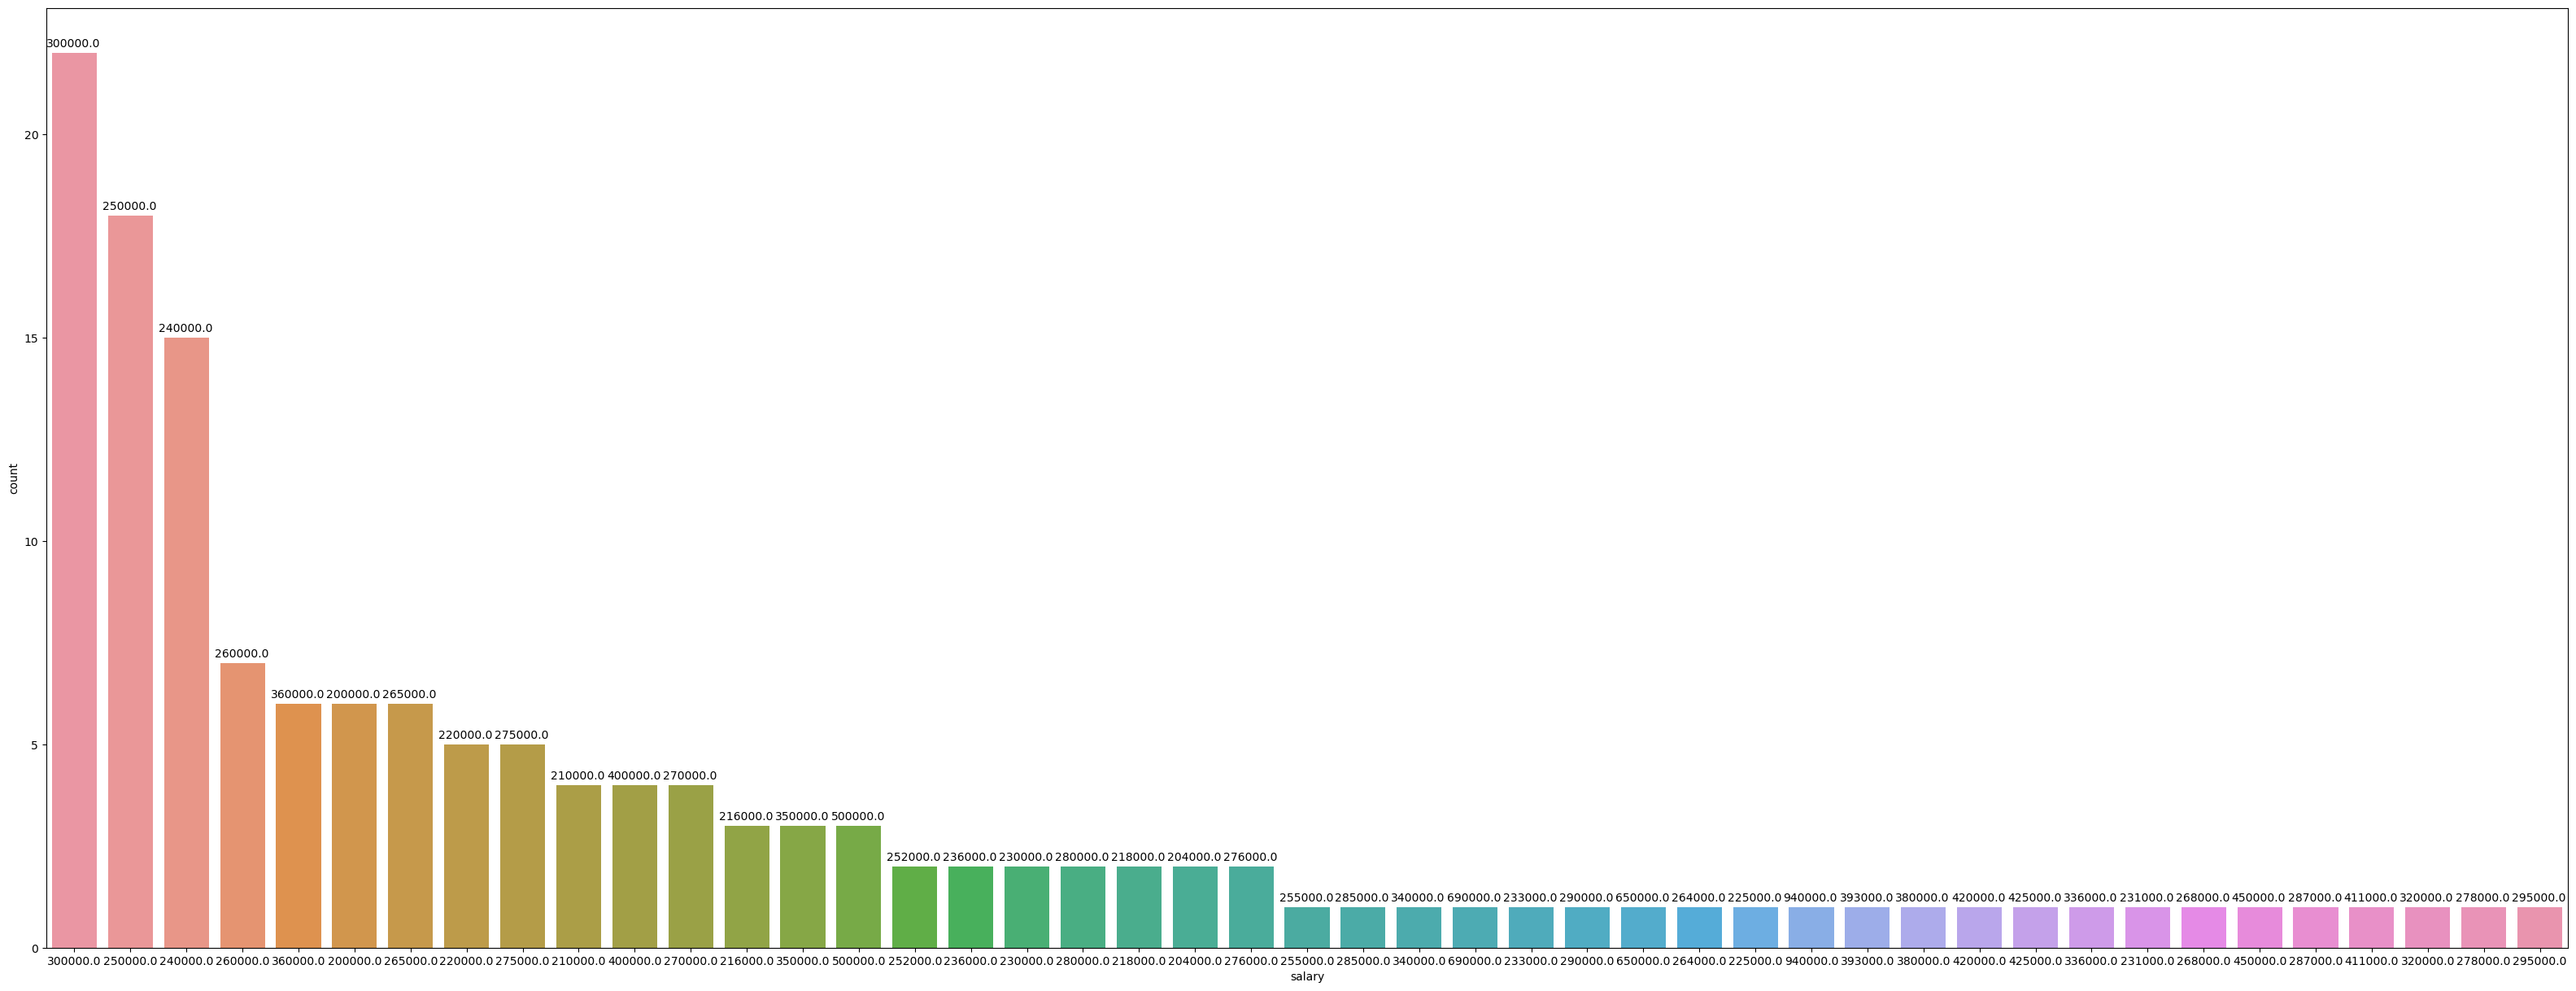

In [13]:
plt.figure(figsize=(40,15))
ax=sns.countplot(x='salary', data=data, order = data['salary'].value_counts().index)
for p, label in zip(ax.patches, data["salary"].value_counts().index):
    ax.annotate(label, (p.get_x()-0.1, p.get_height()+0.15))

In [14]:
data['salary']=data['salary'].fillna(data['salary'].mean())

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['ssc_b']= le.fit_transform(data['ssc_b'])
data['hsc_b']= le.fit_transform(data['hsc_b'])
data['hsc_s']= le.fit_transform(data['hsc_s'])
data['degree_t']= le.fit_transform(data['degree_t'])
data['status']= le.fit_transform(data['status'])

In [16]:
pred=data[['status','salary']]

In [17]:
pred1=data[['status']]
pred2=data[['salary']]

In [18]:
X_data=data.drop(['status','salary'],axis=1)

In [19]:
dummy_data=X_data.join(pred1)

In [20]:
dummy_data.corr().sort_values(by='status',ascending=False)['status']

C:\Users\HP\AppData\Local\Temp\ipykernel_14708\1004945217.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dummy_data.corr().sort_values(by='status',ascending=False)['status']


status      1.000000
ssc_p       0.607889
hsc_p       0.491228
degree_p    0.479861
etest_p     0.127639
ssc_b       0.037297
hsc_s       0.033442
hsc_b       0.016945
degree_t   -0.020352
Name: status, dtype: float64

In [21]:
preprocess=['ssc_p','hsc_p','degree_p','etest_p']

In [22]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_data[preprocess] = min_max_scaler.fit_transform(X_data[preprocess])

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb


X_train, X_test, Y_train, Y_test = train_test_split(X_data, pred1, test_size=0.3)
clf = DecisionTreeClassifier(random_state=10)
clf.fit(X_train,Y_train)

ValueError: could not convert string to float: 'M'

In [24]:
from sklearn.model_selection import GridSearchCV

clf2 = xgb.XGBClassifier(random_state=10)
clf2.fit(X_train, Y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:gender: object, workex: object

In [ ]:
X_test

In [25]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds1 = clf.predict(X_test)

print("DT Precision = {}".format(precision_score(Y_test,preds1, average='macro')))
print("DT Recall = {}".format(recall_score(Y_test, preds1, average='macro')))
print("DT Accuracy = {}".format(accuracy_score(Y_test, preds1)))

ValueError: could not convert string to float: 'M'

In [26]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = clf2.predict(X_test)

print("XGB Precision = {}".format(precision_score(Y_test,preds, average='macro')))
print("XGB Recall = {}".format(recall_score(Y_test, preds, average='macro')))
print("XGB Accuracy = {}".format(accuracy_score(Y_test, preds)))

NotFittedError: need to call fit or load_model beforehand

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

auc = roc_auc_score(Y_test, preds)
print('XGB ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Y_test, preds)
print("XGB Matrix", matrix)

NameError: name 'preds' is not defined

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

auc = roc_auc_score(Y_test, pred1)
print('DT ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Y_test, pred1)
print("DT Matrix ",matrix)

ValueError: Found input variables with inconsistent numbers of samples: [65, 215]